In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dirpath = "~/Desktop/CS498/project/rssi_distance/"
timeStamp = 0
RSSI = 2
nDistance = 11
measurePoints = list(range(0,400+1,40))

In [2]:
avgRSSI = []
tGap = []
nPkt = []

for i in range(nDistance):
    record = pd.read_csv(''.join([dirpath, str(i), ".csv"])) # no header
    tGap.append(record.iloc[-1, timeStamp]-record.iloc[0, timeStamp])
    nPkt.append(record.shape[0])
    avgRSSI.append(record.iloc[:, RSSI].mean())

In [3]:
print(tGap)
print(nPkt)
print(avgRSSI)

[56602, 59498, 59798, 59006, 59796, 59515, 59501, 59597, 59489, 59635, 59480]
[568, 633, 615, 517, 627, 585, 597, 634, 564, 616, 588]
[-17.357394366197184, -28.652448657187993, -47.49105691056911, -61.317214700193425, -52.685805422647526, -56.62222222222222, -54.415410385259634, -56.41798107255521, -61.90780141843972, -58.050324675324674, -63.03061224489796]


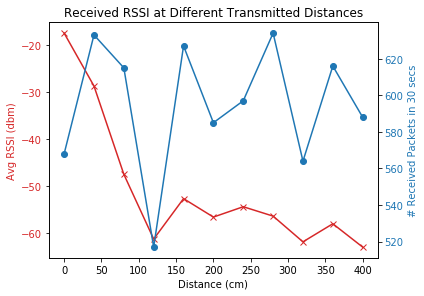

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Distance (cm)')
ax1.set_ylabel('Avg RSSI (dbm)', color=color)
ax1.plot(measurePoints, avgRSSI, '-x', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# Received Packets in 30 secs', color=color)  # we already handled the x-label with ax1
ax2.plot(measurePoints, nPkt, '-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Received RSSI at Different Transmitted Distances')
plt.show()